# Check results from 10 simulation boxes:

Plot:
- auto-correlation mean and scatter for all sims in the raw, true_cont, and baseline cases
- same for cross-correlation
- same for the ratio

In [1]:
import yaw
import numpy as np
from astropy.io import fits
import pylab as pl
from yaw.correlation import autocorrelate_scalar, crosscorrelate_scalar

# Plot spectra

In [6]:
def weighted_lyaf(wave, delta, weight, zqso, zbin_edges, old=False):
    # the old code was wrong but want to see what's the impact
    emit = 1215.67
    lambda_rf_min=1040
    lambda_rf_max=1200
    dodgy_lowz_cut=3600
    
    objred = (wave-emit)/emit
    lambda_obs_min=lambda_rf_min*(1+zqso)
    lambda_obs_max=lambda_rf_max*(1+zqso)
    in_forest=np.logical_and(wave > lambda_obs_min, wave < lambda_obs_max)
    in_forest *= wave > dodgy_lowz_cut

    # now bin:
    deltaF = np.zeros(len(zbin_edges)-1)
    for kk in range(len(zbin_edges)-1):
        useind = (objred>zbin_edges[kk])&(objred<=zbin_edges[kk+1])
        useind *= in_forest
        if len(objred[useind])>0:
            num_pix = len(objred[useind])
            totweights = np.sum(weight[useind])
            # weighted average of deltaF
            if old == False:
                deltaF[kk] = np.sum(delta[useind]*weight[useind])/totweights
            elif old == True:
                deltaF[kk] = np.sum(delta[useind])/num_pix
    return deltaF

In [18]:
zbin_edges = np.linspace(1.96, 3.00, 11)
zz = (zbin_edges[1:] + zbin_edges[:-1])/2.

In [2]:
root = "/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/"

In [56]:
# raw:
simroot = root + f"analysis-0/jura-0/raw/deltas_lya/Delta/"
print(simroot)
#fname_list = glob(simroot + "*.fits.gz", recursive = True)

fin = fits.open(simroot  + "delta-1334.fits.gz")
hduh = fin[1].header
print(hduh)

jj = 0
wavelength_log = fin[jj+1].data['LOGLAM']
delta1 = fin[jj+1].data['DELTA']
weights1 = fin[jj+1].data['WEIGHT']
wave = 10**wavelength_log
zqso = hduh['Z']
ra = hduh['RA']
dec = hduh['DEC']
print(ra, dec, zqso)

emit = 1215.67
objred = (wave-emit)/emit

/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/analysis-0/jura-0/raw/deltas_lya/Delta/
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   32 / width of table in bytes                        NAXIS2  =                  793 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    4 / number of fields in each row                   TTYPE1  = 'LOGLAM  '           / label for field   1                            TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            TTYPE2  = 'DELTA   '           / label for f

In [15]:
deltaFbin1 = weighted_lyaf(wave, delta1, weights1, zqso, zbin_edges, old=False)
deltaFbin1_old = weighted_lyaf(wave, delta1, weights1, zqso, zbin_edges, old=True)

(2.3, 2.82)

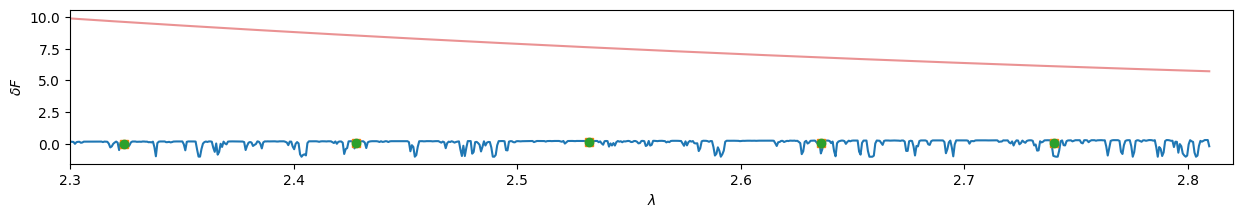

In [57]:
# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred, delta1)
pl.plot(zz, deltaFbin1,'s')
pl.plot(zz, deltaFbin1_old,'o')
pl.plot(objred, weights1,alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

In [51]:
# check object ID for the noisy ones:
root = "/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/"
simroot = root + f"analysis-0/jura-0/baseline/deltas_lya/Delta/"
print(simroot)

fin = fits.open(simroot  + "delta-1334.fits.gz")
hdu = fin[1].header
#hduh
print(fin[2].header)
ID = fin[2].data['LOS_ID']
objind = ID == 870000004
wave = fin[1].data
ra = (fin[2].data['RA'])[objind]
dec = (fin[2].data['DEC'])[objind]
zqso2 = fin[2].data['Z'][objind]
delta2 = fin[3].data[objind,:]
weights2 = fin[4].data[objind,:]
print(ra, dec, zqso2)

/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/analysis-0/jura-0/baseline/deltas_lya/Delta/
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   84 / width of table in bytes                        NAXIS2  =                  828 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    9 / number of fields in each row                   TTYPE1  = 'LOS_ID  '           / label for field   1                            TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           TTYPE2  = 'RA      '           / label 

In [52]:
deltaFbin2 = weighted_lyaf(wave, delta2[0,:], weights2[0,:], zqso2, zbin_edges, old=False)
deltaFbin2_old = weighted_lyaf(wave, delta2[0,:], weights2[0,:], zqso2, zbin_edges, old=True)

(2.3, 2.82)

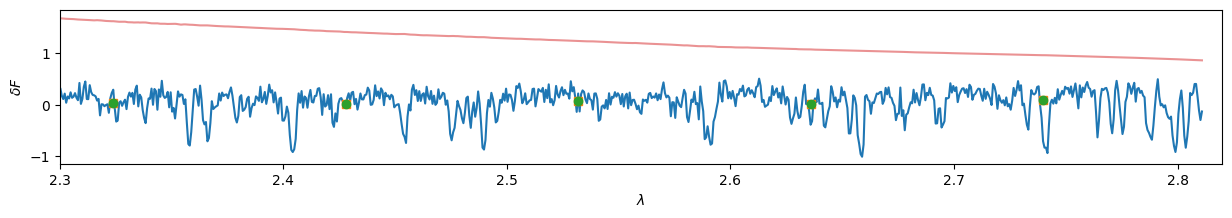

In [53]:
# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred, delta2[0,:])
pl.plot(zz, deltaFbin2,'s')
pl.plot(zz, deltaFbin2_old,'o')
pl.plot(objred, weights2[0,:],alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

Check file below

In [40]:
# check object ID for the noisy ones:
root = "/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/"
simroot = root + f"analysis-0/jura-0/err_true_cont/deltas_lya/Delta/"
print(simroot)

fin = fits.open(simroot  + "delta-1334.fits.gz")
hdu = fin[1].header
#hduh
print(fin[2].header)
ID = fin[2].data['LOS_ID']
objind = ID == 870000004
wave3 = fin[1].data
ra = (fin[2].data['RA'])[objind]
dec = (fin[2].data['DEC'])[objind]
zqso3 = fin[2].data['Z'][objind]
delta3 = fin[3].data[objind,:]
weights3 = fin[4].data[objind,:]
objred3 = (wave3-emit)/emit
print(ra, dec, zqso3)

/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/lya_mocks/mock_analysis/qq_desi_y5/skewers_desi_footprint.5/analysis-0/jura-0/err_true_cont/deltas_lya/Delta/
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   84 / width of table in bytes                        NAXIS2  =                  811 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    9 / number of fields in each row                   TTYPE1  = 'LOS_ID  '           / label for field   1                            TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           TTYPE2  = 'RA      '           / l

In [41]:
deltaFbin3 = weighted_lyaf(wave3, delta3[0,:], weights3[0,:], zqso3, zbin_edges, old=False)
deltaFbin3_old = weighted_lyaf(wave3, delta3[0,:], weights3[0,:], zqso3, zbin_edges, old=True)

(2.3, 2.82)

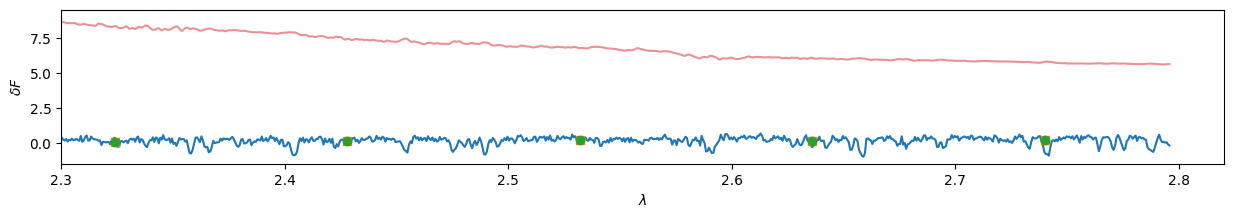

In [50]:
# let's plot the flux, binned flux for old and new cases:
pl.figure(figsize=[15,2])
pl.plot(objred3, delta3[0,:])
pl.plot(zz, deltaFbin3,'s')
pl.plot(zz, deltaFbin3_old,'o')
pl.plot(objred3, weights3[0,:],alpha=0.5)
pl.xlabel("$\\lambda$")
pl.ylabel("$\\delta F$")
pl.xlim([2.3,2.82])

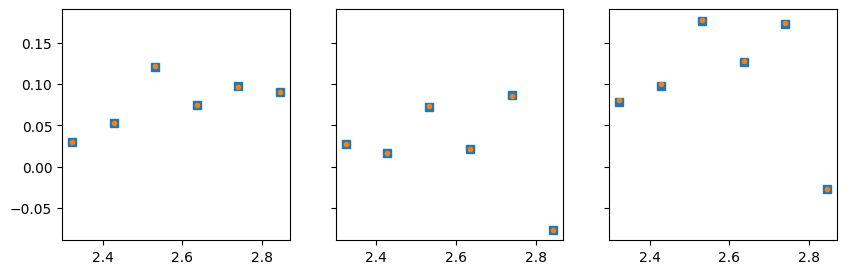

In [48]:
fig,axarr=pl.subplots(1,3,figsize=[10,3],sharey=True)
pl.sca(axarr[0])
pl.plot(zz[3:-1], deltaFbin1[3:-1],'s')
pl.plot(zz[3:-1], deltaFbin1_old[3:-1],'.')

pl.sca(axarr[1])
pl.plot(zz[3:-1], deltaFbin2[3:-1],'s')
pl.plot(zz[3:-1], deltaFbin2_old[3:-1],'.')

pl.sca(axarr[2])
pl.plot(zz[3:-1], deltaFbin3[3:-1],'s')
pl.plot(zz[3:-1], deltaFbin3_old[3:-1],'.')

In [27]:
# compute wavelength limits:
lambda_rf_min=1040
lambda_rf_max=1200
lambda_obs_min=lambda_rf_min*(1+zqso)
lambda_obs_max=lambda_rf_max*(1+zqso)
lambda_obs_additional = 3600

emit = 1215.67
objred = (wave-emit)/emit
print(lambda_obs_min,lambda_obs_max, lambda_obs_additional)

3997.567443847661 4612.577819824224 3600


In [28]:
def lambda_to_z(x):
    emit = 1215.67
    return  (x-emit)/emit

def z_to_lambda(y):
    emit = 1215.67
    return y*emit + emit

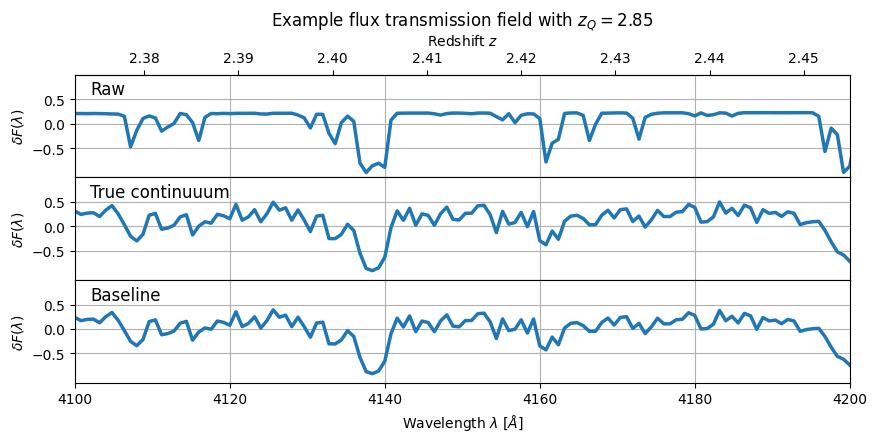

In [103]:
fig,axarr = pl.subplots(3, figsize=[10,4],sharex=True, sharey=True)
for ii in range(3):
    pl.sca(axarr[ii])
    pl.grid()
    pl.ylabel("$\\delta F(\\lambda)$")

pl.sca(axarr[0])
pl.plot(wave, delta_l, lw=2.5)
pl.text(4102, 0.6, "Raw", size=12)
pl.title("Example flux transmission field with $z_Q = 2.85$")
pl.xlim([4100,4200])

secax = axarr[0].secondary_xaxis('top', functions=(lambda_to_z, z_to_lambda))
secax.set_xlabel('Redshift $z$')

pl.sca(axarr[1])
pl.plot(wave3, delta3[0,:], lw=2.5)
pl.text(4102, 0.6, "True continuuum", size=12)

pl.sca(axarr[2])
pl.plot(wave2, delta2[0,:], lw=2.5)
pl.xlim([4100,4200])
pl.xlabel("Wavelength $\\lambda$ [$\\AA$]")
pl.text(4102, 0.6, "Baseline", size=12)
pl.ylim([-1.1, 1.0])
pl.yticks([-0.5,0,0.5])
    
pl.subplots_adjust(hspace=0)
pl.savefig("../plots/delta_f_example.pdf",bbox_inches="tight")

In [ ]:
# compute weighted flux





In [29]:
delta.shape

(828, 2716)

# Delta F on a cut-out

In [131]:
# load delta f catalogue 
fname = "/pscratch/sd/q/qhang/desi-lya/results/run-0/catalogue/delta-raw.fits"
fin = fits.open(fname)
#fin[1].header

# select a redshift bin:
zbinfile = np.loadtxt("/pscratch/sd/q/qhang/desi-lya/delta_F/zbins.txt")
nbin = 5
zbinedges = zbinfile[5:7,0]
print(zbinedges)

# get ra, dec, delta f
ind = (fin[1].data['Z']>zbinedges[0])&(fin[1].data['Z']<zbinedges[1])
ra = fin[1].data['RA'][ind]
dec = fin[1].data['DEC'][ind]
delta = fin[1].data['DELTA_F'][ind]

ind2 = (ra>150) & (ra<160) & (dec> 5) & (dec<10)

[2.1407783  2.19805536]


In [132]:
# select a redshift bin:
fname = "/pscratch/sd/q/qhang/desi-lya/results/run-0/catalogue/delta-baseline.fits"
fin = fits.open(fname)

# get ra, dec, delta f
ind = (fin[1].data['Z']>zbinedges[0])&(fin[1].data['Z']<zbinedges[1])
ra2 = fin[1].data['RA'][ind]
dec2 = fin[1].data['DEC'][ind]
delta2 = fin[1].data['DELTA_F'][ind]

ind22 = (ra2>150) & (ra2<160) & (dec2> 5) & (dec2<10)

In [135]:
# select a redshift bin:
fname = "/pscratch/sd/q/qhang/desi-lya/results/run-0/catalogue/delta-true_cont.fits"
fin = fits.open(fname)

# get ra, dec, delta f
ind = (fin[1].data['Z']>zbinedges[0])&(fin[1].data['Z']<zbinedges[1])
ra3 = fin[1].data['RA'][ind]
dec3 = fin[1].data['DEC'][ind]
delta3 = fin[1].data['DELTA_F'][ind]

ind23 = (ra3>150) & (ra3<160) & (dec3> 5) & (dec3<10)

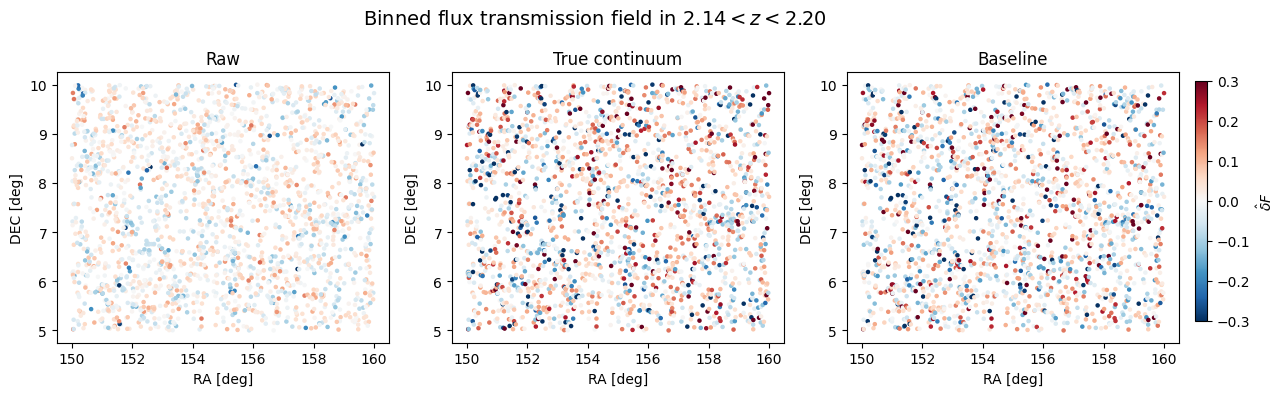

In [165]:
fig,axarr=pl.subplots(1,3,figsize=[12,4])

fig.suptitle("Binned flux transmission field in $2.14<z<2.20$", fontsize=14)

pl.sca(axarr[0])
pl.scatter(ra[ind2], dec[ind2], c=delta[ind2], s=5, 
           vmax=0.3,vmin=-0.3,cmap='RdBu_r')
pl.xlabel("RA [deg]")
pl.ylabel("DEC [deg]")
pl.title("Raw")
#pl.colorbar()

pl.sca(axarr[1])
pl.scatter(ra3[ind23], dec3[ind23], c=delta3[ind23], s=5, 
           vmax=0.3,vmin=-0.3,cmap='RdBu_r')
pl.xlabel("RA [deg]")
pl.ylabel("DEC [deg]")
pl.title("True continuum")
#pl.colorbar()

pl.sca(axarr[2])
im = pl.scatter(ra2[ind22], dec2[ind22], c=delta2[ind22], s=5, 
           vmax=0.3,vmin=-0.3,cmap='RdBu_r')
pl.xlabel("RA [deg]")
pl.ylabel("DEC [deg]")
pl.title("Baseline")

pl.tight_layout()

cb_ax = fig.add_axes([1, 0.2, 0.01, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$\\hat{\\delta} F$')
pl.savefig("../plots/delta_f_catalog_example.pdf",bbox_inches="tight")

# YAW results

In [167]:
root = "/pscratch/sd/q/qhang/desi-lya/results/"

In [168]:
w_ss = {}
w_sp = {}
ncc = {}
w_ss_jn = {}
w_sp_jn = {}
ncc_jn = {}
for mode in ['raw','true_cont','baseline']:
    w_ss[mode] = np.zeros((18,10))
    w_sp[mode] = np.zeros((18,10))
    ncc[mode] = np.zeros((18,10))

    w_ss_jn[mode] = np.zeros((18,10))
    w_sp_jn[mode] = np.zeros((18,10))
    ncc_jn[mode] = np.zeros((18,10))
    for ii in range(10):
        if mode == 'true_cont':
            if ii!=2:
                fname = root + f"run-{ii}/yaw/w_ss-{mode}.hdf5"
                f = yaw.ScalarCorrFunc.from_file(fname)
                w_ss[mode][:,ii] = (f.sample().data)[1:-1]
                w_ss_jn[mode][:,ii] = (f.sample().error)[1:-1]
        
                fname = root + f"run-{ii}/yaw/w_sp-{mode}.hdf5"
                f = yaw.ScalarCorrFunc.from_file(fname)
                w_sp[mode][:,ii] = (f.sample().data)[1:-1]
                w_sp_jn[mode][:,ii] = (f.sample().error)[1:-1]
        
                fname = root + f"run-{ii}/yaw/nz_estimate-{mode}.hdf5"
                f=yaw.RedshiftData.from_files(fname)
                ncc[mode][:,ii] = (-f.data)[1:-1]
                ncc_jn[mode][:,ii] = (f.error)[1:-1]
        else:
            fname = root + f"run-{ii}/yaw/w_ss-{mode}.hdf5"
            f = yaw.ScalarCorrFunc.from_file(fname)
            w_ss[mode][:,ii] = (f.sample().data)[1:-1]
            w_ss_jn[mode][:,ii] = (f.sample().error)[1:-1]
    
            fname = root + f"run-{ii}/yaw/w_sp-{mode}.hdf5"
            f = yaw.ScalarCorrFunc.from_file(fname)
            w_sp[mode][:,ii] = (f.sample().data)[1:-1]
            w_sp_jn[mode][:,ii] = (f.sample().error)[1:-1]
    
            fname = root + f"run-{ii}/yaw/nz_estimate-{mode}.hdf5"
            f=yaw.RedshiftData.from_files(fname)
            ncc[mode][:,ii] = (-f.data)[1:-1]
            ncc_jn[mode][:,ii] = (f.error)[1:-1]
z = (f.binning.mids)[1:-1]

# delete the row in true_cont:
w_ss['true_cont'] = np.delete(w_ss['true_cont'],2,axis=1)
w_sp['true_cont'] = np.delete(w_sp['true_cont'],2,axis=1)
ncc['true_cont'] = np.delete(ncc['true_cont'],2,axis=1)

w_ss_jn['true_cont'] = np.delete(w_ss_jn['true_cont'],2,axis=1)
w_sp_jn['true_cont'] = np.delete(w_sp_jn['true_cont'],2,axis=1)
ncc_jn['true_cont'] = np.delete(ncc_jn['true_cont'],2,axis=1)

/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:703: RuntimeWarning: invalid value encountered in divide
  data = kk_counts.data / nn_counts.data
/global/u2/q/qhang/desc/yet_another_wizz/src/yaw/correlation/paircounts.py:704: RuntimeWarning: invalid value encountered in divide
  samples = kk_counts.samples / nn_counts.samples


In [169]:
w_ss_mean = {}
w_sp_mean = {}
ncc_mean = {}
for mode in ['raw','true_cont','baseline']:
    w_ss_mean[mode] = np.c_[np.mean(w_ss[mode],axis=1), np.std(w_ss[mode],axis=1)]
    w_sp_mean[mode] = np.c_[np.mean(w_sp[mode],axis=1), np.std(w_sp[mode],axis=1)]
    ncc_mean[mode] = np.c_[np.mean(ncc[mode],axis=1), np.std(ncc[mode],axis=1)]

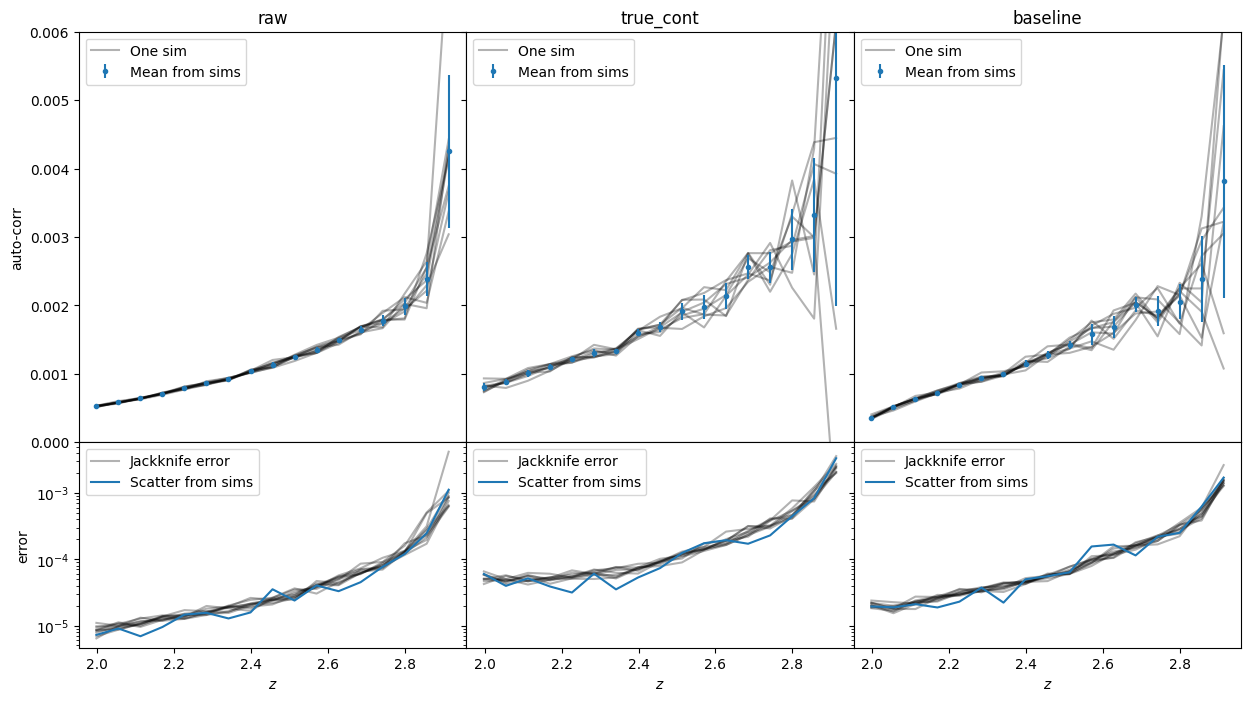

In [170]:
# now make the plots:
fig,axarr=pl.subplots(2,3,figsize=[15,8],sharey='row', gridspec_kw={'height_ratios': [3,1.5]},
                     sharex=True)

for mm, mode in enumerate(['raw','true_cont','baseline']):
    if mode == 'true_cont':
        N=9
    else:
        N=10
    for ii in range(N):
        if ii == 0:
            label1="One sim"
            label2="Jackknife error"
        else:
            label1=""
            label2=""

        pl.sca(axarr[0, mm])
        pl.plot(z[1:], w_ss[mode][1:,ii],color='k',alpha=0.3,label=label1) 
        pl.sca(axarr[1,mm]) 
        pl.plot(z[1:], w_ss_jn[mode][1:,ii],color='k',alpha=0.3,label=label2) 
        
    pl.sca(axarr[0, mm])
    pl.errorbar(z[1:], w_ss_mean[mode][1:,0], yerr=w_ss_mean[mode][1:,1], fmt='.', label="Mean from sims")
    pl.title(mode)
    pl.legend()
    
    pl.sca(axarr[1, mm])
    pl.plot(z[1:], w_ss_mean[mode][1:,1], label="Scatter from sims")
    pl.xlabel("$z$")
    pl.legend()
    pl.yscale('log')

pl.sca(axarr[0,0])
pl.ylabel("auto-corr")
pl.ylim([0,0.006])

pl.sca(axarr[1,0])
pl.ylabel("error")

pl.subplots_adjust(wspace=0, hspace=0)

pl.savefig("../plots/auto-corr.pdf",bbox_inches="tight")

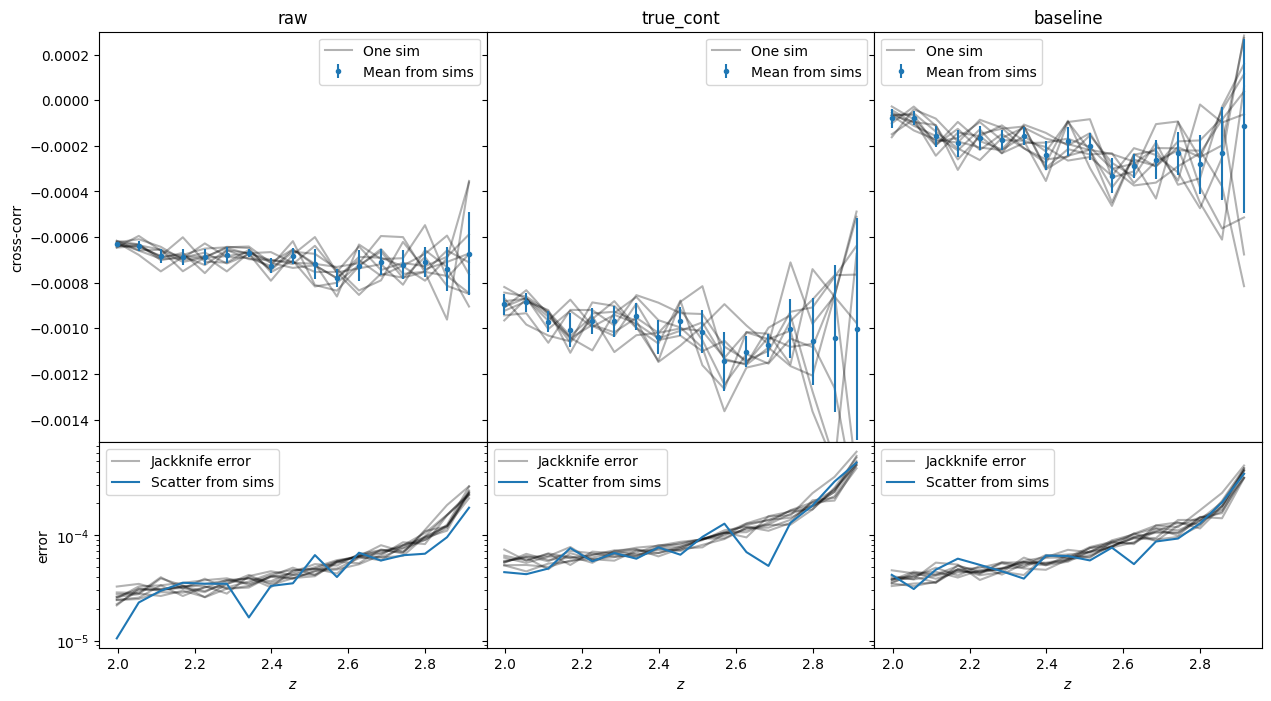

In [171]:
# now make the plots:
fig,axarr=pl.subplots(2,3,figsize=[15,8],sharey='row', gridspec_kw={'height_ratios': [3,1.5]},
                     sharex=True)

for mm, mode in enumerate(['raw','true_cont','baseline']):
    if mode == 'true_cont':
        N=9
    else:
        N=10
    for ii in range(N):
        if ii == 0:
            label1="One sim"
            label2="Jackknife error"
        else:
            label1=""
            label2=""

        pl.sca(axarr[0, mm])
        pl.plot(z[1:], w_sp[mode][1:,ii],color='k',alpha=0.3,label=label1) 
        pl.sca(axarr[1,mm]) 
        pl.plot(z[1:], w_sp_jn[mode][1:,ii],color='k',alpha=0.3,label=label2) 
        
    pl.sca(axarr[0, mm])
    pl.errorbar(z[1:], w_sp_mean[mode][1:,0], yerr=w_sp_mean[mode][1:,1], fmt='.', label="Mean from sims")
    pl.title(mode)
    pl.legend()
    
    pl.sca(axarr[1, mm])
    pl.plot(z[1:], w_sp_mean[mode][1:,1], label="Scatter from sims")
    pl.xlabel("$z$")
    pl.legend()
    pl.yscale('log')

pl.sca(axarr[0,0])
pl.ylabel("cross-corr")
pl.ylim([-0.0015,0.0003])

pl.sca(axarr[1,0])
pl.ylabel("error")

pl.subplots_adjust(wspace=0, hspace=0)

pl.savefig("../plots/cross-corr.pdf",bbox_inches="tight")

In [ ]:
# now make the plots:
fig,axarr=pl.subplots(2,3,figsize=[15,8],sharey='row', gridspec_kw={'height_ratios': [3,1.5]},
                     sharex=True)

for mm, mode in enumerate(['raw','true_cont','baseline']):
    if mode == 'true_cont':
        N=9
    else:
        N=10
    for ii in range(N):
        if ii == 0:
            label1="One sim"
            label2="Jackknife error"
        else:
            label1=""
            label2=""

        pl.sca(axarr[0, mm])
        pl.plot(z[1:], ncc[mode][1:,ii],color='k',alpha=0.3,label=label1) 
        pl.sca(axarr[1,mm]) 
        pl.plot(z[1:], ncc_jn[mode][1:,ii],color='k',alpha=0.3,label=label2) 
        
    pl.sca(axarr[0, mm])
    pl.errorbar(z[1:], ncc_mean[mode][1:,0], yerr=ncc_mean[mode][1:,1], fmt='.', label="Mean from sims")
    pl.title(mode)
    pl.legend()
    
    pl.sca(axarr[1, mm])
    pl.plot(z[1:], ncc_mean[mode][1:,1], label="Scatter from sims")
    pl.xlabel("$z$")
    pl.legend()
    pl.yscale('log')

pl.sca(axarr[0,0])
pl.ylabel("-w_sp / sqrt(w_ss)")

pl.sca(axarr[1,0])
pl.ylabel("error")

pl.subplots_adjust(wspace=0, hspace=0)
pl.savefig("../plots/ncc.pdf",bbox_inches="tight")